<center>
    <h1>Thermal response of human skin to microwave energy: A critical review</h1>
</center>

**Authors.** Kenneth R. Foster, Marvin C. Ziskin and Quirino Balzano

**Journal.** Health Phys. 111(6): 528-541; 2016

**DOI.** 10.1097/HP.0000000000000571

**Aim.** Review and modelling study of heating of tissue by microwave energy in the frequency range from 3 GHz through millimiter frequency range, up to 300 GHz motivated by the anticipated 5G communication technology deployment and its poorly researched potential hazard mechanisms. 

**Method.** Comprehensive survey of the available data on heating tissues with microwave energy in the millimeter-wave frequency spectrum; developement of a simple thermal model based on the Pennes' bioheat transfer equation without *post hoc* parameter adjustment; comparisson of existing data with model predictions.

**Results.** The simple model presented and solved both analytically and numerically (in 1-D and 2-D) presents successful approximation of thermal responses of tissue over a wide range of exposure conditions and is well-aligned with the available experimental data. However, one must be aware of assumptions made while developing this model: only the small irradiated area is considered so that the thermal conduction effects, which are essentially independent of physiological changes, e.g., thermoregulatory responses by means of blood perfusion gradient, predominated; exposure scenarios were of short duration so that the steady state was not reached, which further increase the relative importance of heat conduction and blood perfusion influence interplay; finally, the incident power densities were rather high, above rates of convective and radiative skin cooling, so that insulated boundary conditions did make a good approximation.

**Conclusion.** There is a great lack of data in the relevant literature on heating of human tissues, assuming it is the only detrimental effect on human tissue, by radio-frequency energy in the frequency range considered in the present study. The over-simplified one-dimensional thermal model strikes with surprisingly successful and acurate predictions of the thermal response in human tissue with no adjustment of model parameters, the problem is however, there are only few data to conduct tests on. The study has shown that the scaling properties of the Pennes' bioheat transfer equation and heat conduction equations can be useful in synthesizing thermal response of skin to radio-frequency exposures over wide ranges, and as such, this approach may be suitable for evaluation of safety limits for radiofrequency radiation and/or may be used as a analytical benchmark for more detailed numerical models.

## Model

Pennes' bioheat transfer equation (BHTE) can be written as follows:

$$
k \nabla^2 T - \rho^2 C m_b T + \rho \mbox{SAR} = \rho C \frac{\partial T}{\partial t}
$$

where
- $T$ is the temperature raise of the tissue ($\mbox{°C}$) above the baseline temperature (i.e., the temperature preceeding to radio-frequency exposure);
- $k$ is the thermal conductivity of the tissue ($0.37 \mbox{ W/m°/C}$);
- $\mbox{SAR}$ is the microwave power deposition rate ($\mbox{W/kg}$);
- $C$ is the heat capacity of the tissue ($3390 \mbox{ Ws/kg/°C}$);
- $\rho$ is the tissue density ($1109 \mbox{ kg/m}^3$);
- $m_b$ is the volumetric perfusion rate of blood ($1767 \cdot 10^{-6} \mbox{ m}^3\mbox{s/kg}$), which should be interpreted as an empirical parameter and not literally as a capillary perfusion rate

with insulated boundary conditions as a conservative assumption.
The choice of boundary conditions is justified because the rate of conduction of heat from microwave exposure into deeper layers of skin can be expected to be well below the rate of heat loss from skin to the environment:

$$
k \frac{\partial T}{\partial z} > h(\Delta T_{sur} - T_{air})
$$

where
- $T_{sur}$ and $T_{air}$ are the temperatures of the tissue surface and surrounding air;
- $\partial T / \partial z$ is the temperature gradient at the surface;
- $h$ is the heat transfer coefficient (of the order $[1-10] \mbox{ W/m/°C}$).

Under the assumption of plane wave radio-frequency energy on a uniform plane of tissue with normal incidence, the source term in BHTE can be written as follows:

$$
\mbox{SAR} = \frac{I_0 T_{tr}}{\rho L} e^{-z/L}
$$

where
- $I_0$ is the incident power density on the tissue;
- $T_{tr}$ is the energy transmission coefficient into the tissue;
- $L$ is the energy penetration depth into tissue, which is defined as the distance beneath the surface at which the $\mbox{SAR}$ has fallen to a factor of $1/e$ below that at the surface.

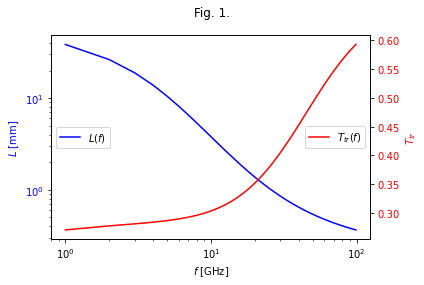

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import epsilon_0 as eps_0, mu_0, pi

from utils import load_tissue_diel_properties


f = np.arange(1., 100.) * 1e9  # frequency range 1 GHz up to 100 GHz
omega = 2 * pi * f
sigma, eps_r, tan_loss, pen_depth = np.vectorize(load_tissue_diel_properties)('skin_dry', f)
Z_air = np.sqrt(mu_0 / eps_0)
Z_skin_dry = np.sqrt(mu_0 / (eps_r * eps_0))
T_tr = 2 * Z_skin_dry / (Z_air + Z_skin_dry)  # energy transmission coefficient into the tissue

fig, ax1 = plt.subplots()
fig.suptitle('Fig. 1.')

ax1.plot(f / 1e9, pen_depth * 10 * 100, 'b-', label='$L(f)$')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('$f$ [GHz]')
ax1.set_ylabel('$L$ [mm]', color='b')
ax1.legend(loc='center left')

ax2 = ax1.twinx()
ax2.plot(f / 1e9, np.abs(T_tr), 'r-', label='$T_{tr}(f)$')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_xscale('log')
ax2.set_ylabel('$T_{tr}$', color='r')
ax2.legend(loc='center right')

plt.tight_layout()
plt.show()

## Scaling properties of a 1-D version of the presented model: semi-infinite plane exposed to incident plane wave

The thermal response of the 1-D model is characterized by two time scales representing heat transport by blood perfusion and thermal conduction, respectively:

$$
\tau_1 = \frac{1}{m_b \rho} \sim 500 \mbox{s}
$$

$$
\tau_2 = \frac{L^2}{\alpha}
$$

where
* $\alpha = k / \rho C$ is the thermal diffusivity ($9.8 \cdot 10^{-8} \mbox{ m}^2/\mbox{s}$).

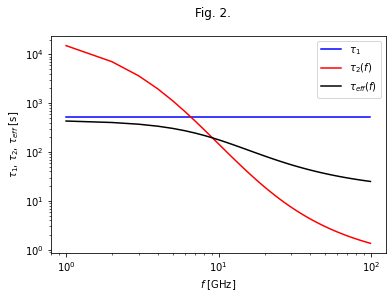

In [11]:
m_b = 1.767e-6
rho = 1109
tau_1 = 1 / (m_b * rho)

k = 0.37
C = 3390
alpha = k / (rho * C)
tau_2 = pen_depth**2 / alpha

tau_eff = (tau_2 - np.sqrt(tau_1 * tau_2)) / (tau_2 / tau_1 - 1)

fig, ax = plt.subplots()
fig.suptitle('Fig. 2.')

ax.plot(f / 1e9, np.ones_like(f) * tau_1, 'b-', label='$\\tau_1$')
ax.plot(f / 1e9, tau_2, 'r-', label='$\\tau_2(f)$')
ax.plot(f / 1e9, tau_eff, 'k-', label='$\\tau_{eff}(f)$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$f$ [GHz]')
ax.set_ylabel('$\\tau_1$, $\\tau_2$, $\\tau_{eff}$ [s]')
ax.legend()
plt.show()

For low perfusion rates ($m_b \rightarrow 0$), BHTE approaches the simple heat conduction equation.
In that case, the transient solution for the surface temperature $T_{sur}$ is readily available, assuming $L \rightarrow 0$:

$$
T_{sur}(t) = C_1 \sqrt{t} - C_2 \big( 1 - e^{t/\tau_2} erfc \sqrt{t/\tau_2} \big)
$$

where
* $C_1 = \frac{2 I_0 T_{tr}}{\sqrt{\pi k \rho C}} = 9.54 \cdot 10^{-4} I_0 T_{tr} \mbox{ °C/s}^{0.5}$
* $C_2 = \frac{I_0 T_{tr} L}{k} = 2.7 \cdot I_0 T_{tr} \mbox{ °C}$

The term $C_2$ rapidly approaches zero as $t>\tau_2$ and describes an early transient effect associated with diffusion of heat over the energy penetration depth.
In the absence of a perfusion term, after an initial transient, $T_{sur}$ increases without limit with $t^{0.5}$.

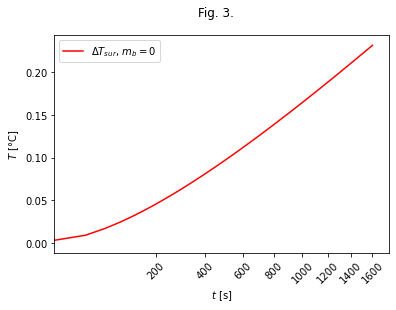

In [12]:
from utils import register_sqrt_scale
from scipy.special import erfc


f = 6e9
sigma, eps_r, tan_loss, pen_depth = load_tissue_diel_properties('skin_dry', f)
rho = 1109
k = 0.37
C = 3390
tau_2 = pen_depth**2 / (k / (rho * C))
I_0_x_T_tr = 10
t = np.linspace(0, 1600)

m_b = 0  # the blood perfusion term is absent
C_1 = 2 * I_0_x_T_tr / np.sqrt(pi * k * rho * C)
C_2 = I_0_x_T_tr * pen_depth / k
T_sur = C_1 * np.sqrt(t) - C_2 * (1 - np.exp(t / tau_2) * erfc(np.sqrt(t / tau_2)))

fig, ax = plt.subplots()
fig.suptitle('Fig. 3.')

ax.plot(t, T_sur, 'r', label=f'$\\Delta T_{{sur}}$, $m_b = 0$')
register_sqrt_scale()
ax.set_xscale('sqrt')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$T$ [°C]')
ax.legend()
plt.show()

In the presence of blood flow, where $m_b > 0$, $T_{sur}$ approaches a steady state value $T_{ss}$ that can be written as the product of the $\mbox{SAR}$ at the surface and an effective thermal time constant $\tau_{eff}$, as follows:

$$
T_{ss} = \frac{\mbox{SAR}_0}{C} \tau_{eff}
$$

where
* $\tau_{eff} = \frac{\tau_2 - \sqrt{\tau_1 \tau_2}}{\tau_2 / \tau_1 - 1}$
* $\mbox{SAR}_0 = \frac{I_0 T_{tr}}{\rho L}$

In the limiting cases there $\tau_2 >> \tau_1$ and $\tau_2 << \tau_1$, $\tau_{eff}$ approaches the asymptotic values of $\tau_1$ and $(\tau_1 \tau_2)^{0.5}$, respectively, and $T_{ss}$ takes on the limiting values:

$$
T_{ss} \rightarrow \frac{I_0 T_{tr}}{\rho \sqrt{C m_b k}}, \quad \tau_1 / \tau_2 \rightarrow \infty
$$

$$
T_{ss} \rightarrow \frac{I_0 T_{tr}}{L C m_b \rho^2}, \quad \tau_1 / \tau_2 \rightarrow 0
$$

For the mmWave frequency range, of interest in this paper, $\tau_1 >> \tau_2$, and the steady state increase in temperature at the surface for the 1-D case is best described above for the associated case, showing a modest dependence on the blood perfusion term.

The scaling properties of the BHTE in the spatial domain can be investigated with reference to the Green's function, where the Green's function decays exponentially with distance with two intrinsic distance scales,
* the one that accounts for the smoothing effect of blood perfusion, and

$$
R_1 = \frac{\sqrt{k}}{\rho \sqrt{m_b c}}
$$

* the one that represents a measure of the distance that heat diffuses in time, $t$,

$$
R_2 = \sqrt{4 \alpha t} \sim 0.5 \sqrt{t} \mbox{ mm s}^{-0.5}
$$

<center>
    <h1>Thermal modelling for the next generation of radiofrequency exposure limits: Commentary</h1>
</center>

**Authors.** Kenneth R. Foster, Marvin C. Ziskin and Quirino Balzano

**Journal.** Health Phys. 113(1): 41-53; 2017

**DOI.** 10.1097/HP.0000000000000671

**Aim.** 

**Method.** 

**Results.** 

**Conclusion.** 